# Identificar fronteras no lineales

In [1]:
from sklearn.datasets import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor= .1, noise= .1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

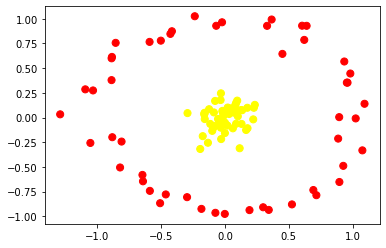

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

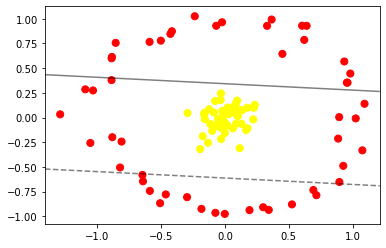

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))

In [8]:
r

array([0.97114234, 0.92012347, 0.99510522, 0.97255937, 0.89566493,
       0.53929901, 0.97494415, 0.39396503, 0.41019101, 0.33374218,
       0.18890118, 0.37869125, 0.2805075 , 0.95251218, 0.35097183,
       0.98984612, 0.39964775, 0.29249252, 0.97921302, 0.91561128,
       0.43939001, 0.95763135, 0.86990643, 0.96044394, 0.40714777,
       0.9410857 , 0.99274932, 0.36668308, 0.99457578, 0.98262088,
       0.40006307, 0.436046  , 0.41962195, 0.44959545, 0.94077386,
       0.99621719, 0.99957596, 0.28155469, 0.95804679, 0.30805684,
       0.36352217, 0.99924057, 0.95201585, 0.99728368, 0.98947553,
       0.38512039, 0.39228584, 0.97552437, 0.3134214 , 0.39190091,
       0.31721385, 0.98747544, 0.97762335, 0.97293512, 0.48900628,
       0.96799083, 0.42370709, 0.40638782, 0.9896611 , 0.31309385,
       0.36121794, 0.33000555, 0.47732525, 0.98836701, 0.37015588,
       0.96638412, 0.97923104, 0.32658571, 0.98984465, 0.9843098 ,
       0.43579487, 0.9930078 , 0.99713442, 0.97789391, 0.97283

In [9]:
from mpl_toolkits import mplot3d

In [10]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    

In [11]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 8.67073228e-02,  1.47526490e-01],
       [-1.33527759e-01, -2.55768945e-01],
       [-2.02549883e-02,  6.70562275e-02],
       [-1.59804011e-01,  4.78208708e-02],
       [ 1.14773106e-01, -3.11473965e-01],
       [ 4.49472687e-01,  6.44561417e-01],
       [-1.58521302e-01, -1.56870679e-02],
       [-2.32114307e-02,  9.64859763e-01],
       [-1.84505995e-01, -9.25791488e-01],
       [ 9.25994469e-01, -4.89817063e-01],
       [-1.29054102e+00,  3.21734998e-02],
       [ 3.29420653e-01,  9.28717443e-01],
       [ 6.38938014e-01,  9.28931115e-01],
       [-3.01403147e-02, -2.18503883e-01],
       [ 1.02321208e+00, -9.29272499e-03],
       [-8.69571858e-02,  5.14220925e-02],
       [ 1.91752149e-01, -9.38297855e-01],
       [ 6.03671505e-01,  9.29998335e-01],
       [ 1.29579641e-01, -6.49244470e-02],
       [-2.93542625e-01,  4.46777275e-02],
       [-4.63603061e-01, -7.79384402e-01],
       [ 1.65162162e-01, -1.26545816e-01],
       

In [13]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

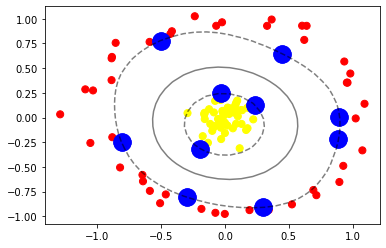

In [14]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")